In [9]:
%reload_ext autoreload
%autoreload 2

import fastai
from fastai.imports import *
from fastai.vision import *
from fastai.metrics import *
from fastai.gen_doc.nbdoc import *
print('fast.ai version:{}'.format(fastai.__version__))

fast.ai version:1.0.53.dev0


In [16]:
PATH = "/home/yqs/Desktop/dogs-vs-cats-redux-kernels-edition/"
image_size=224
batch_size=32
model = models.resnet50

In [19]:
import os
fnames = get_image_files(PATH+'/train')
fnames[:5]

[PosixPath('/home/yqs/Desktop/dogs-vs-cats-redux-kernels-edition/train/dog.9467.jpg'),
 PosixPath('/home/yqs/Desktop/dogs-vs-cats-redux-kernels-edition/train/cat.6998.jpg'),
 PosixPath('/home/yqs/Desktop/dogs-vs-cats-redux-kernels-edition/train/cat.1057.jpg'),
 PosixPath('/home/yqs/Desktop/dogs-vs-cats-redux-kernels-edition/train/dog.10584.jpg'),
 PosixPath('/home/yqs/Desktop/dogs-vs-cats-redux-kernels-edition/train/cat.8101.jpg')]

In [14]:
show_doc(get_transforms)

<h4 id="get_transforms" class="doc_header"><code>get_transforms</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/transform.py#L307" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#get_transforms-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>get_transforms</code>(**`do_flip`**:`bool`=***`True`***, **`flip_vert`**:`bool`=***`False`***, **`max_rotate`**:`float`=***`10.0`***, **`max_zoom`**:`float`=***`1.1`***, **`max_lighting`**:`float`=***`0.2`***, **`max_warp`**:`float`=***`0.2`***, **`p_affine`**:`float`=***`0.75`***, **`p_lighting`**:`float`=***`0.75`***, **`xtra_tfms`**:`Optional`\[`Collection`\[[`Transform`](/vision.image.html#Transform)\]\]=***`None`***) → `Collection`\[[`Transform`](/vision.image.html#Transform)\]

<div class="collapse" id="get_transforms-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#get_transforms-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>get_transforms</code>:</p><ul><li><code>pytest -sv tests/test_vision_data.py::test_image_to_image_different_tfms</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L328" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_image_to_image_different_y_size</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L313" class="source_link" style="float:right">[source]</a></li></ul><p>Some other tests where <code>get_transforms</code> is used:</p><ul><li><code>pytest -sv tests/test_vision_transform.py::test_crop_without_size</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_transform.py#L123" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Utility func to easily create a list of flip, rotate, [`zoom`](/vision.transform.html#_zoom), warp, lighting transforms.  

In [20]:
pattern_get_class = re.compile(r'/([^/]+)\.\d+\.jpg$')
data = ImageDataBunch.from_name_re(path = PATH,
                                   fnames = fnames, 
                                   pat = pattern_get_class, 
                                   ds_tfms=get_transforms(), 
                                   test ='test',
                                   size=image_size, 
                                   bs=batch_size,
                                   num_workers=0).normalize(imagenet_stats)

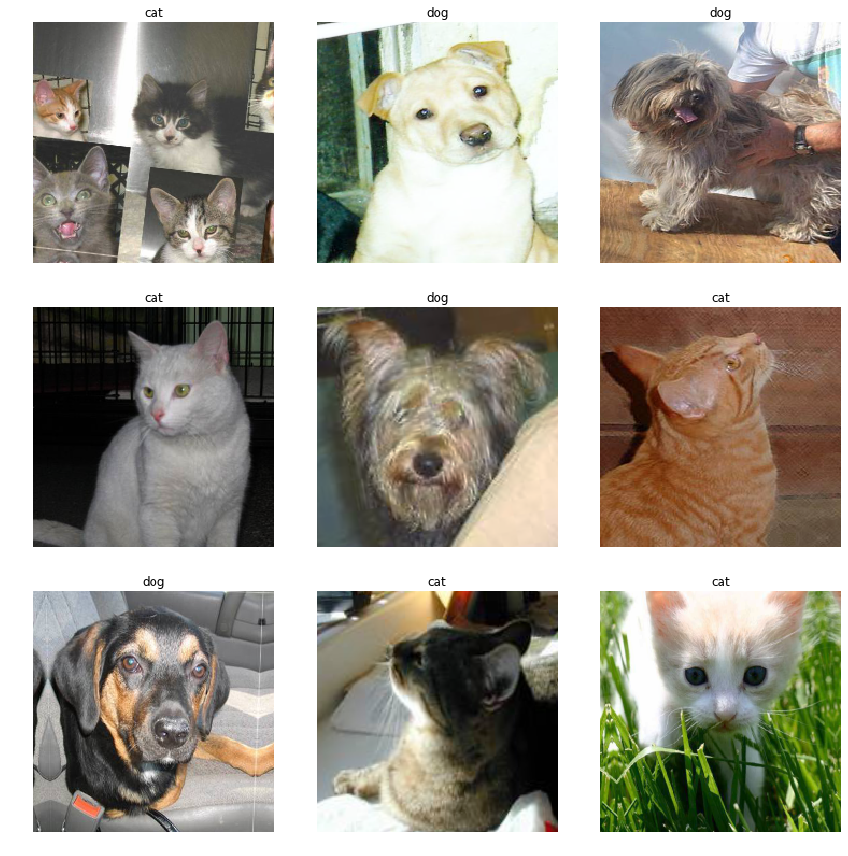

In [21]:
data.show_batch(rows=3)

In [28]:
learn = create_cnn(data, model, metrics=accuracy, model_dir='/home/yqs/Desktop/train_catdog')

In [29]:
show_doc(learn.fit_one_cycle)

<h4 id="fit_one_cycle" class="doc_header"><code>fit_one_cycle</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L14" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#fit_one_cycle-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>fit_one_cycle</code>(**`learn`**:[`Learner`](/basic_train.html#Learner), **`cyc_len`**:`int`, **`max_lr`**:`Union`\[`float`, `Collection`\[`float`\], `slice`\]=***`slice(None, 0.003, None)`***, **`moms`**:`Point`=***`(0.95, 0.85)`***, **`div_factor`**:`float`=***`25.0`***, **`pct_start`**:`float`=***`0.3`***, **`final_div`**:`float`=***`None`***, **`wd`**:`float`=***`None`***, **`callbacks`**:`Optional`\[`Collection`\[[`Callback`](/callback.html#Callback)\]\]=***`None`***, **`tot_epochs`**:`int`=***`None`***, **`start_epoch`**:`int`=***`None`***)

<div class="collapse" id="fit_one_cycle-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#fit_one_cycle-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>fit_one_cycle</code>:</p><ul><li><code>pytest -sv tests/test_train.py::test_fit_one_cycle</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_train.py#L36" class="source_link" style="float:right">[source]</a></li></ul><p>Some other tests where <code>fit_one_cycle</code> is used:</p><ul><li><code>pytest -sv tests/test_tabular_train.py::test_empty_cont</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_tabular_train.py#L71" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_text_train.py::test_qrnn_works_if_split_fn_provided</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_text_train.py#L73" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_text_train.py::test_qrnn_works_with_no_split</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_text_train.py#L61" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Fit a model following the 1cycle policy.  

In [30]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.056121,0.025944,0.990400,15:42


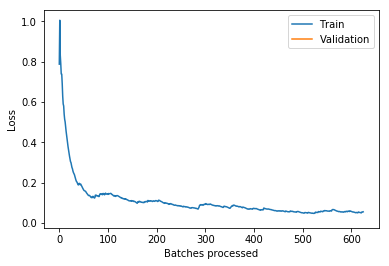

In [31]:
learn.recorder.plot_losses()

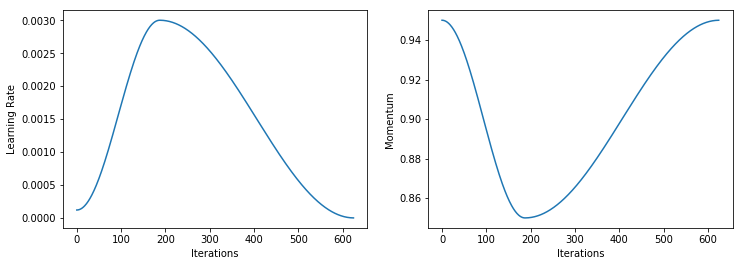

In [32]:
learn.recorder.plot_lr(show_moms=True)

In [33]:
learn.save('stage-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


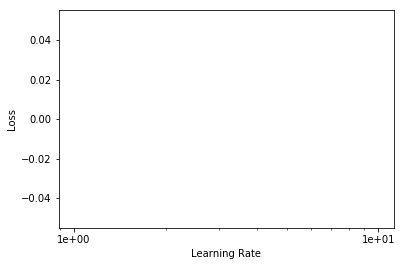

In [34]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [35]:
learn.load('stage-1')
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.047273,0.020420,0.991800,15:49
1,0.033296,0.019708,0.992400,16:03
2,0.024547,0.014500,0.994200,16:08
3,0.025958,0.013976,0.995600,16:01


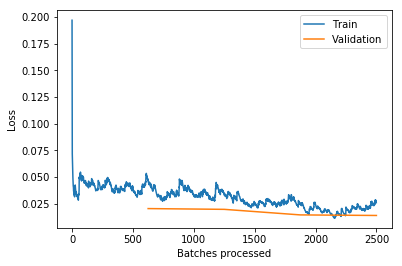

In [36]:
learn.recorder.plot_losses()

In [37]:
learn.save('stage-2')

In [38]:
interp = ClassificationInterpretation.from_learner(learn)

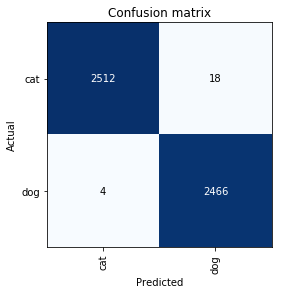

In [39]:
interp.plot_confusion_matrix()

In [43]:
try:
    # TTA cause error @fast.ai v1.0.39
    preds, _ = learn.TTA(ds_type=DatasetType.Test)
except:
    preds, _ = learn.get_preds(DatasetType.Test)
else:
    print('Predict with TTA done.')

Predict with TTA done.


In [44]:
preds

tensor([[2.5726e-03, 9.9743e-01],
        [6.0007e-04, 9.9940e-01],
        [9.9902e-01, 9.8008e-04],
        ...,
        [9.9888e-01, 1.1240e-03],
        [9.9994e-01, 5.9245e-05],
        [6.3586e-05, 9.9994e-01]])

In [45]:
print(data.classes)

['cat', 'dog']


In [46]:
dict_label_order = {label:order for order,label in enumerate(data.classes)}

In [47]:
print(dict_label_order)

{'cat': 0, 'dog': 1}


In [49]:
n_dogs = dict_label_order['dog']
prob_dogs = preds[:,n_dogs].numpy()

(array([5970.,  156.,   66.,   25.,   19.,   22.,   26.,   80.,  209., 5927.]),
 array([9.878416e-08, 1.000001e-01, 2.000001e-01, 3.000000e-01, 4.000000e-01, 5.000000e-01, 6.000000e-01, 6.999999e-01,
        8.000000e-01, 8.999999e-01, 9.999999e-01], dtype=float32),
 <a list of 10 Patch objects>)

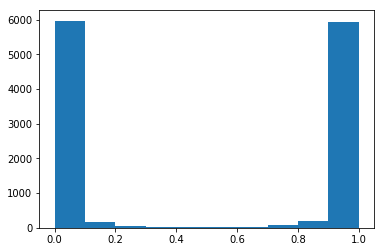

In [50]:
plt.hist(prob_dogs)

In [51]:
ids = [int(file.stem) for file in data.test_ds.x.items]
ids[:10]

[12114, 582, 4610, 1458, 5711, 10352, 8131, 9245, 9560, 6272]

In [52]:
import pandas as pd
submission = pd.DataFrame({'id':ids,'label':prob_dogs})
submission = submission.sort_values(by=['id'])
submission.head()
submission.label.describe()
submission.to_csv('submission.csv', index=False)